In [2]:
from classifier import *
from preprocessing import *
from staff_removal import *

In [2]:
# Get paths of scaned and captured test cases #
scanned_path = './test-cases/test-set-scanned/scanned'
captured_path = './test-cases/test-set-camera-captured/captured'

img_filenames = os.listdir(scanned_path)
for i, fn in enumerate(img_filenames):
    test_number = fn.split('.')[0]

In [3]:
def preprocess_img(img_path, output_path):
    # 1. Read desired image #
    img = cv2.imread(img_path, 0)
    
    # 2. Remove noise (odd pixels) from the image and save it #
    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
    cv2.imwrite('testing-output/{}/1. noise_removed.png'.format(output_path), img)

    # 3. Binarize image using combination of (global + otsu) thresholding and save it #
    threshold, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    cv2.imwrite('testing-output/{}/2. binarized.png'.format(output_path), img)

    # 4. Return image shape (width, height) and processed image # 
    n, m = img.shape
    return n, m, img

## Steps of processing
1. ~Apply Pre-processing~
2. ~Remove Staff lines~
3. ~Cut images into buckets~
4. ~Get reference line for each bucket~
5. ~Segment symbols, Sort them by x-value~
6. Classify symbol

In [4]:
print('Loading dataset. This will take time ...')
features, labels = load_dataset('hog')
print('Finished loading dataset.')

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=random_seed)

Loading dataset. This will take time ...
finished processing:  a_1
finished processing:  a_16
finished processing:  a_16_flipped
finished processing:  a_1_flipped
finished processing:  a_2
finished processing:  a_2_flipped
finished processing:  a_32
finished processing:  a_32_flipped
finished processing:  a_4
finished processing:  a_4_flipped
finished processing:  a_8
finished processing:  a_8_flipped
finished processing:  barline
finished processing:  b_16
finished processing:  b_8
finished processing:  c
finished processing:  chord_2
finished processing:  chord_3
finished processing:  chord_3_2
finished processing:  d
finished processing:  dot
finished processing:  e
finished processing:  f
finished processing:  symbol_bb
finished processing:  t_4_2
finished processing:  t_4_4
finished processing:  z
Finished loading dataset.


In [5]:
model = run_experiment(train_features, test_features, train_labels, test_labels, 'NN')

############## Training NN ##############
Iteration 1, loss = 2.94202541
Iteration 2, loss = 2.37364622
Iteration 3, loss = 1.98135197
Iteration 4, loss = 1.68143343
Iteration 5, loss = 1.45961738
Iteration 6, loss = 1.29055894
Iteration 7, loss = 1.15807572
Iteration 8, loss = 1.05151281
Iteration 9, loss = 0.96406072
Iteration 10, loss = 0.89105407
Iteration 11, loss = 0.82974332
Iteration 12, loss = 0.77735762
Iteration 13, loss = 0.73218739
Iteration 14, loss = 0.69308650
Iteration 15, loss = 0.65850000
Iteration 16, loss = 0.62769063
Iteration 17, loss = 0.60044905
Iteration 18, loss = 0.57594113
Iteration 19, loss = 0.55376995
Iteration 20, loss = 0.53372606
Iteration 21, loss = 0.51520651
Iteration 22, loss = 0.49838089
Iteration 23, loss = 0.48257600
Iteration 24, loss = 0.46829290
Iteration 25, loss = 0.45493984
Iteration 26, loss = 0.44235145
Iteration 27, loss = 0.43065796
Iteration 28, loss = 0.41986480
Iteration 29, loss = 0.40952186
Iteration 30, loss = 0.39977766
Iterati

C:\Users\abdal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


NN accuracy: 96.50211992731677 %


['z']


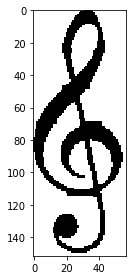

['a_4']


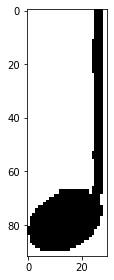

['a_32']


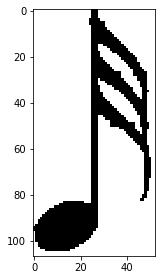

['a_2_flipped']


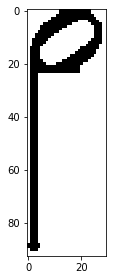

['a_4']


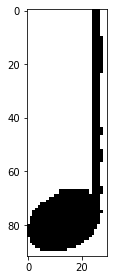

['a_4']


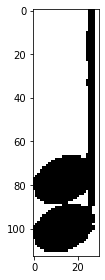

['a_2']


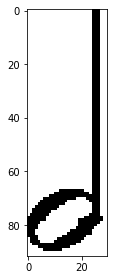

['a_8']


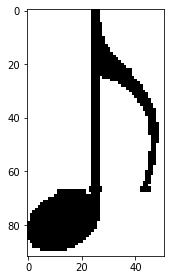

['a_4']


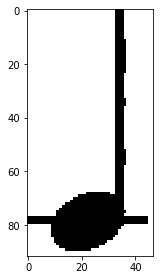

['a_16']


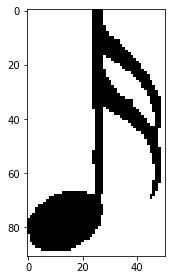

['barline']


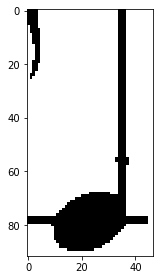

['a_1']


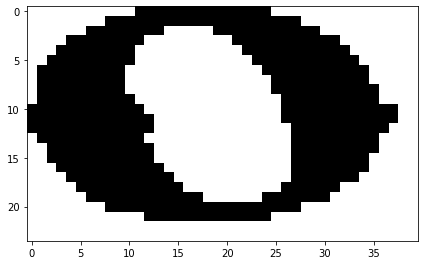

['barline']


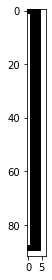

['barline']


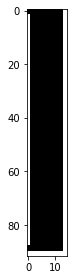

['a_8_flipped']


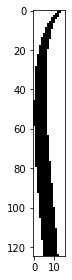

['barline']


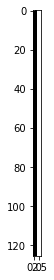

['z']


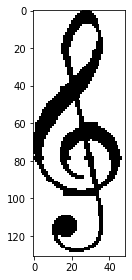

['z']


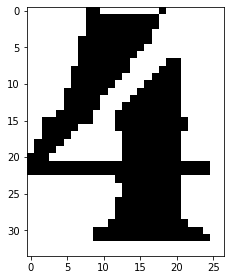

['z']


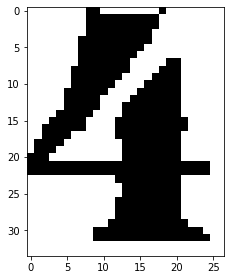

['a_4']


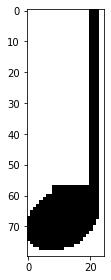

['a_16']


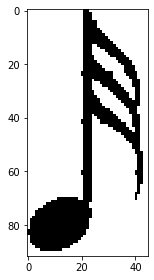

['a_2_flipped']


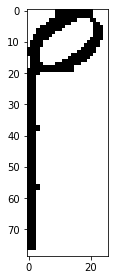

['a_8']


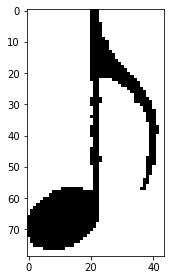

['a_16']


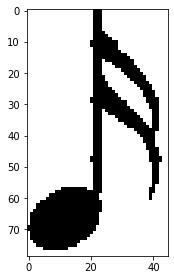

['a_16']


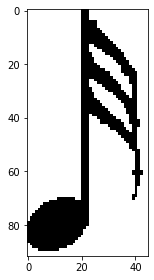

['barline']


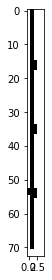

['a_4']


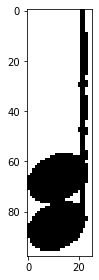

['a_4']


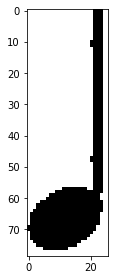

['b_8']


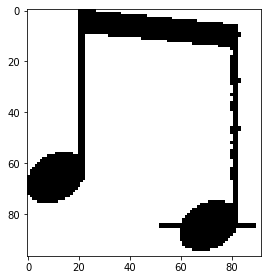

['a_16']


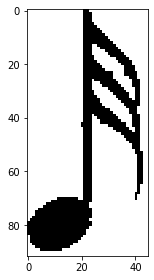

['a_16']


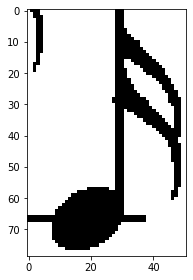

['a_16']


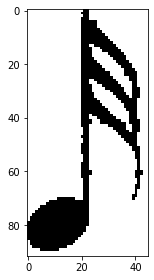

['barline']


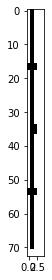

['barline']


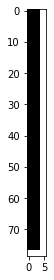

['barline']


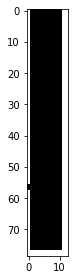

['barline']


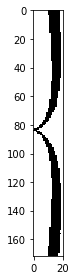

['barline']


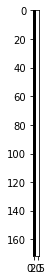

['z']


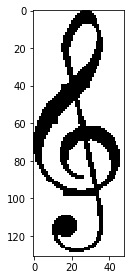

['z']


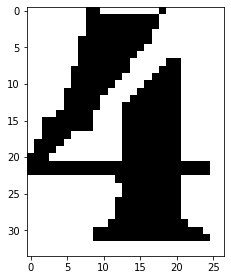

['z']


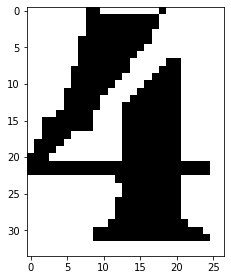

['barline']


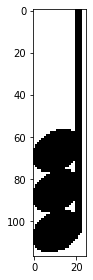

['dot']


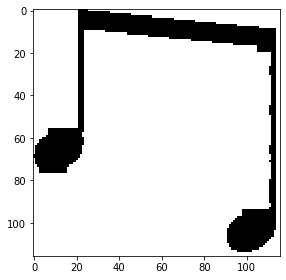

['b_16']


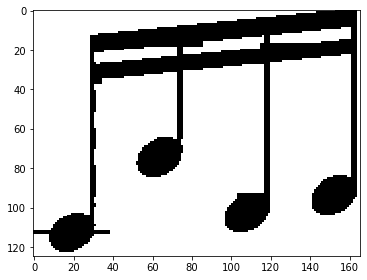

['b_16']


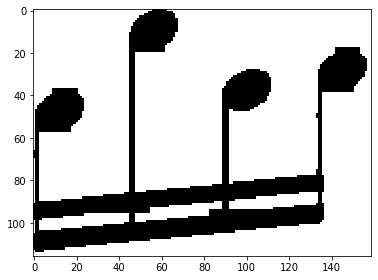

['barline']


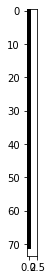

['a_4']


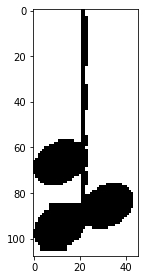

['a_2']


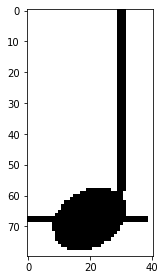

['a_4']


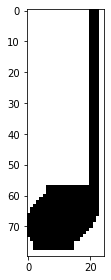

['dot']


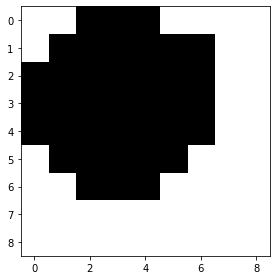

['a_8']


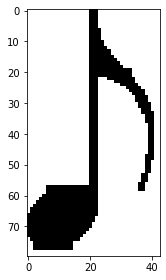

['barline']


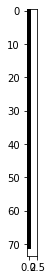

['a_16']


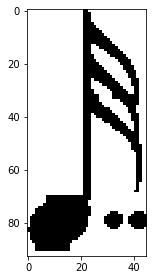

['dot']


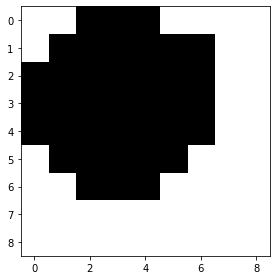

['dot']


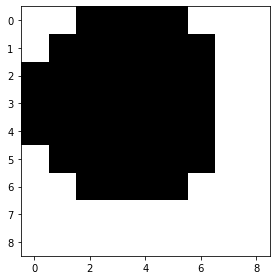

['barline']


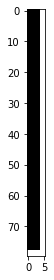

['barline']


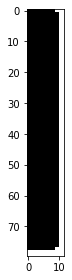

['a_8_flipped']


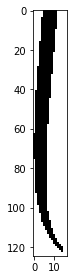

['barline']


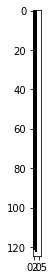

['z']


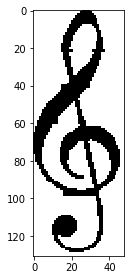

['z']


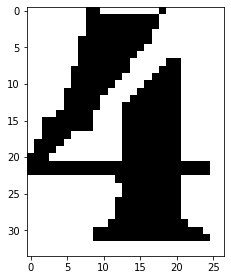

['z']


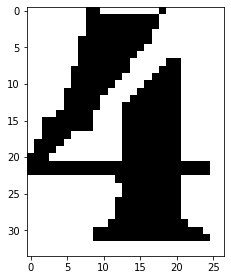

['b_16']


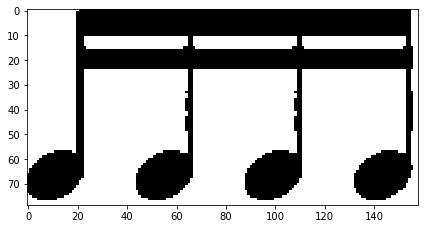

['a_4']


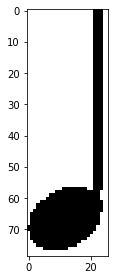

['c']


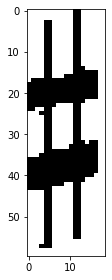

['a_4']


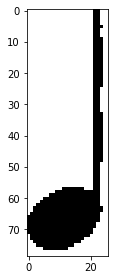

['a_4']


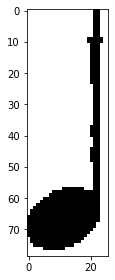

['barline']


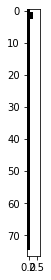

['e']


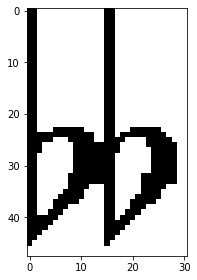

['a_4']


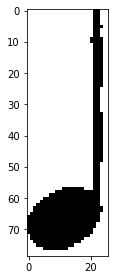

['d']


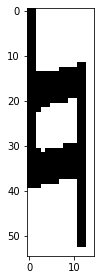

['a_4']


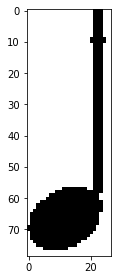

['c']


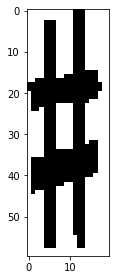

['a_2_flipped']


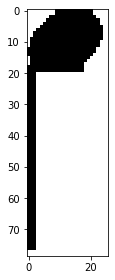

['barline']


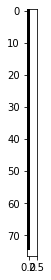

['barline']


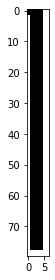

['barline']


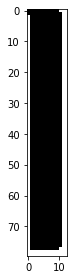

['z']


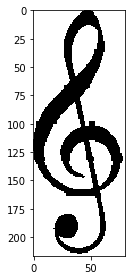

['barline']


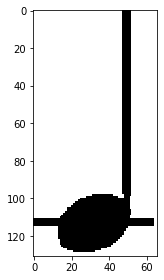

['a_2']


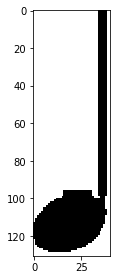

['a_4']


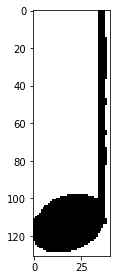

['a_4']


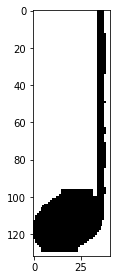

['a_4']


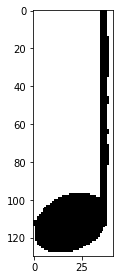

['a_4']


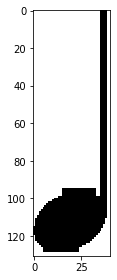

['barline']


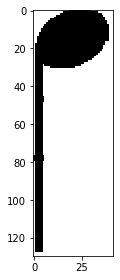

['barline']


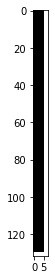

['barline']


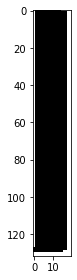

['z']


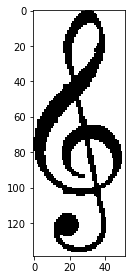

['a_2']


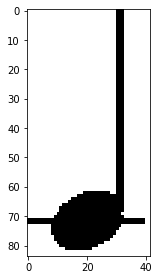

['a_4']


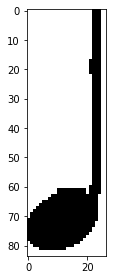

['a_4']


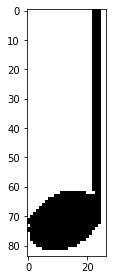

['a_4']


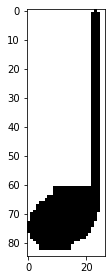

['a_4']


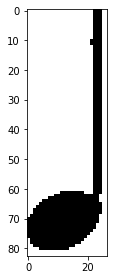

['a_4']


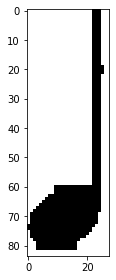

['barline']


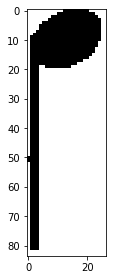

['a_2_flipped']


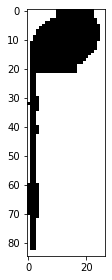

['a_2_flipped']


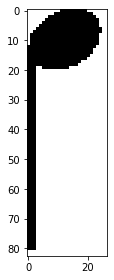

['barline']


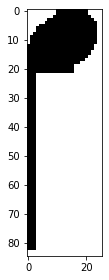

['a_2_flipped']


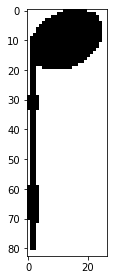

['barline']


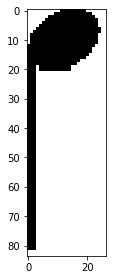

['barline']


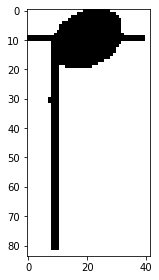

['a_2_flipped']


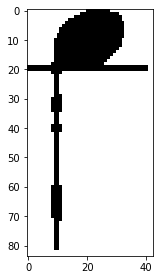

['barline']


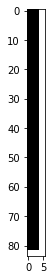

['barline']


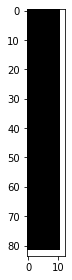

['z']


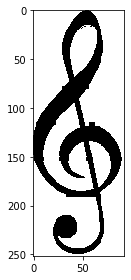

['c']


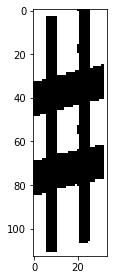

['a_4']


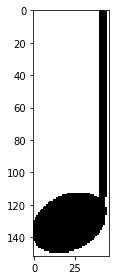

['e']


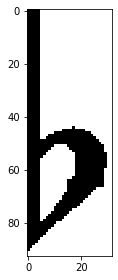

['a_4']


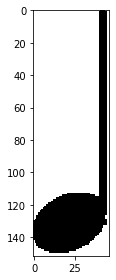

['d']


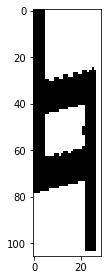

['a_4']


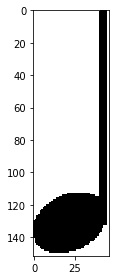

['f']


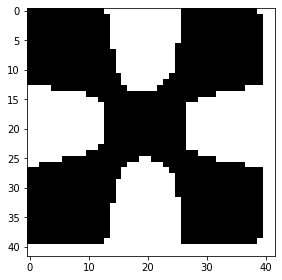

['a_4']


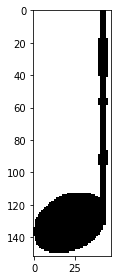

['e']


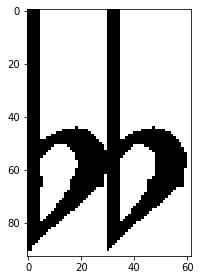

['a_4']


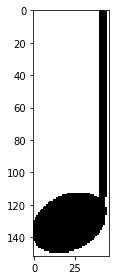

['barline']


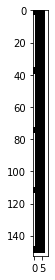

['barline']


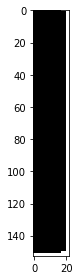

['z']


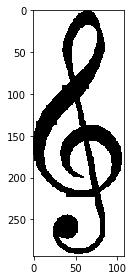

['barline']


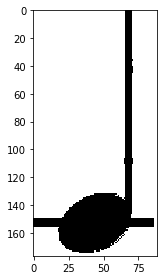

['barline']


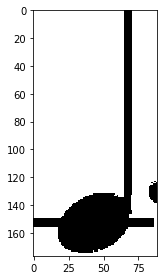

['dot']


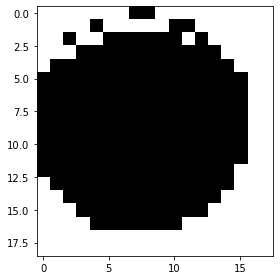

['barline']


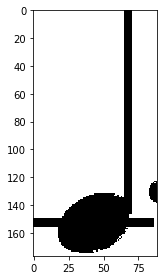

['dot']


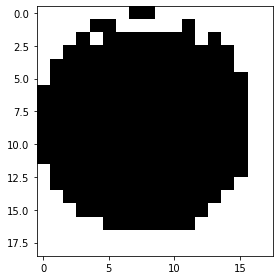

['dot']


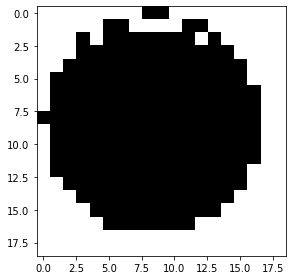

['barline']


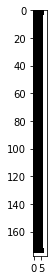

['barline']


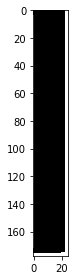

['z']


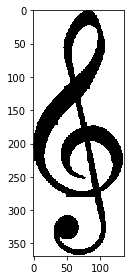

['barline']


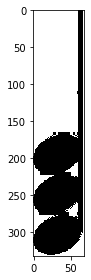

['barline']


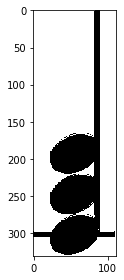

['barline']


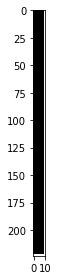

['barline']


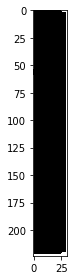

['z']


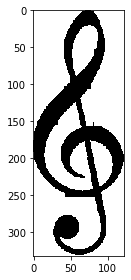

['b_8']


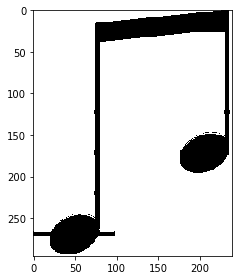

['b_8']


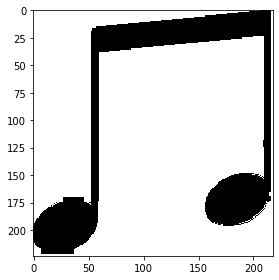

['barline']


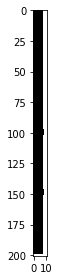

['barline']


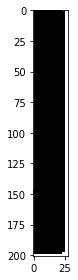

['z']


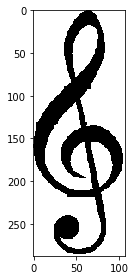

['b_16']


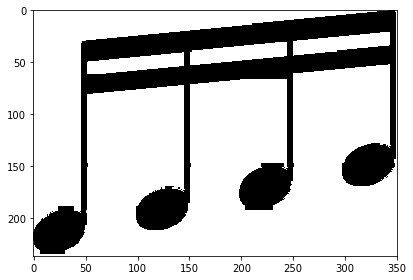

['b_16']


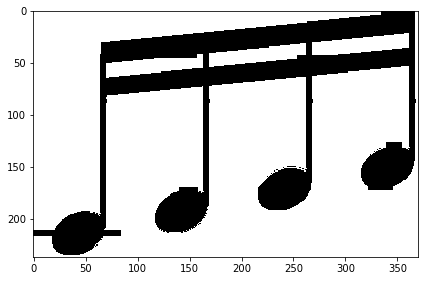

['barline']


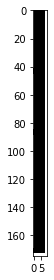

['barline']


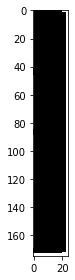

['z']


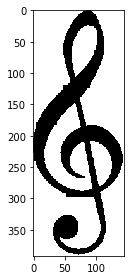

['a_32']


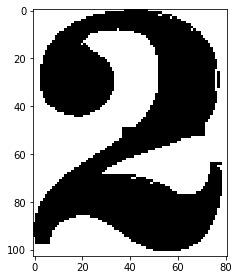

['z']


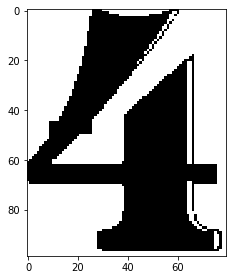

['a_2']


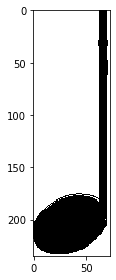

['barline']


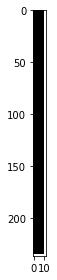

['dot']


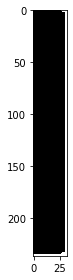

In [6]:
# Threshold for line to be considered as an initial staff line #
threshold = 0.8

for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']:
    try: 
        os.mkdir('testing-output/{}'.format(i)) 
    except OSError as error: 
        pass

    # Get image and its dimensions#
    height, width, in_img = preprocess_img('{}/{}.png'.format(scanned_path, i), '{}'.format(i))
    
    # Get line thinkness and list of staff lines #
    staff_lines_thicknesses, staff_lines = get_staff_lines(width, height, in_img, threshold)

#     TODO: remove after finishing classification
#     print('test image {}'.format(i))
#     print('staff_lines: ', staff_lines)
#     print('staff_lines_thicknesses: ', staff_lines_thicknesses, end='\n\n')

    # Remove staff lines from original image #
    cleaned = remove_staff_lines(in_img, width, staff_lines, staff_lines_thicknesses)
    cv2.imwrite('testing-output/{}/3. cleaned.png'.format(i), cleaned)
    
    # Get list of cutted buckets and cutting positions #
    cut_positions, cutted = cut_image_into_buckets(cleaned, staff_lines)
    
    
    # Get reference line for each bucket #
    ref_lines = get_ref_lines(cut_positions, staff_lines)
    
#     print('ref_lines: ', ref_lines)
    
    for it in range(len(cutted)):
        cur_img = cutted[it].copy()
        symbols_boundries = segmentation(cutted[it])
        symbols_boundries.sort(key = lambda x: (x[0], x[1]))
        
        symbols = []
        for boundry in symbols_boundries:
            # Get the current symbol #
            x1, y1, x2, y2 = boundry
            cur_symbol = cutted[it][y1:y2+1, x1:x2+1]
            
            # Start prediction of the current symbol #
            feature = extract_features(cur_symbol, 'hog')
            print(model.predict([feature]))
            
            io.imshow(cur_symbol)
            io.show()
            
        
            
        cv2.imwrite(f'testing-output/{i}/4. cutted-{it + 1}.png', cutted[it])
        cv2.imwrite(f'testing-output/{i}/5. cutted-segmented-{it + 1}.png', cur_img)